# Flight Price Prediction

###### A Flight Price Prediction project using different techniques and performing some data visualizations to better understand our data.

### Step 1 – Importing libraries required

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
import pickle

### Step 2 – Reading training data.

In [2]:
train_data = pd.read_excel('Data_Train.xlsx')
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Step 3 – Checking values in the Destination column.


In [3]:
train_data['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

### Merging Delhi and New Delhi.

In [4]:
def newd(x):
    if x=='New Delhi':
        return 'Delhi'
    else:
        return x

train_data['Destination'] = train_data['Destination'].apply(newd)

### Step 4 – Checking info of our train data.

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### Step 5 – Make day and month columns as Datetime columns.

In [6]:
train_data['Journey_day'] = pd.to_datetime(train_data['Date_of_Journey'],format='%d/%m/%Y').dt.day
train_data['Journey_month'] = pd.to_datetime(train_data['Date_of_Journey'],format='%d/%m/%Y').dt.month

train_data.drop('Date_of_Journey',inplace=True,axis=1)

train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


### Step 6 – Extracting hours and minutes from time.
As done above we will extract departure hour and departure minutes from departure time.                                         
And same will be done for arrival time.
And after that, we will drop both columns.

In [7]:
train_data['Dep_hour'] = pd.to_datetime(train_data['Dep_Time']).dt.hour
train_data['Dep_min'] = pd.to_datetime(train_data['Dep_Time']).dt.minute
train_data.drop('Dep_Time',axis=1,inplace=True)

train_data['Arrival_hour'] = pd.to_datetime(train_data['Arrival_Time']).dt.hour
train_data['Arrival_min'] = pd.to_datetime(train_data['Arrival_Time']).dt.minute
train_data.drop('Arrival_Time',axis=1,inplace=True)

train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


### Step 7 – Checking values in the Duration column.


In [8]:
train_data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
30h 25m      1
41h 20m      1
32h 55m      1
13h 35m      1
28h 30m      1
Name: Duration, Length: 368, dtype: int64

### Step 8 – Dropping the Duration column and extracting important info from it.


In [9]:
#Creating a list of all the durations present in the data.
duration = list(train_data['Duration'])
#We are just bringing every duration to the same format. There might be a case when some flight 
#duration will be just 30m so we will write it as ‘0h 30m’ and there may also be cases like 2h so we will write it as ‘2h 0m’.
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]

duration_hour = []
duration_min = []

#Simply split it into 2 components, hour and minute.
for i in duration:
    h,m = i.split()
    duration_hour.append(int(h[:-1]))
    duration_min.append(int(m[:-1]))
    
#Add two columns ‘Duration_hours’ and ‘Duration_mins’.
train_data['Duration_hours'] = duration_hour
train_data['Duration_mins'] = duration_min

#Drop the original Duration column.
train_data.drop('Duration',axis=1,inplace=True)
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


### Step 9 – Plotting Airline vs Price.

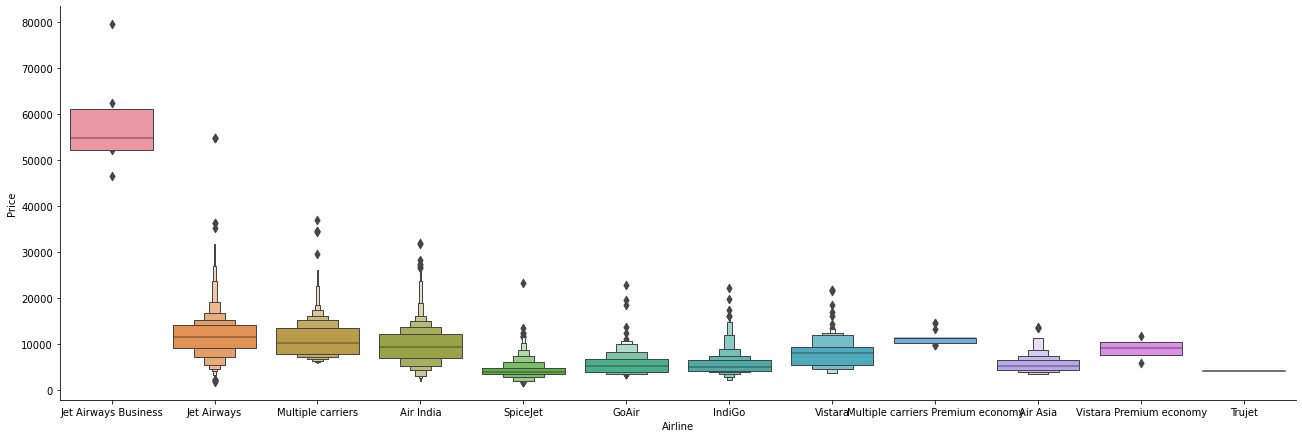

In [10]:
sns.catplot(x='Airline',y='Price',data=train_data.sort_values('Price',ascending=False),kind='boxen',aspect=3,height=6)

### Step 10 – Create dummy columns out of the Airline column.


In [11]:
airline = train_data[['Airline']]
airline = pd.get_dummies(airline,drop_first=True)

### Step 11 – Plotting Source vs Price.

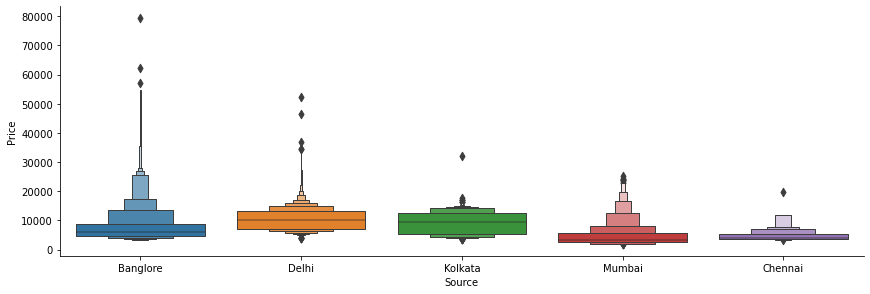

In [12]:
# If we are going from Banglore the prices are slightly higher as compared to other cities
sns.catplot(x='Source',y='Price',data=train_data.sort_values('Price',ascending=False),kind='boxen',aspect=3,height=4)

### Step 12 – Create dummy columns out of the Source column.


In [13]:
source = train_data[['Source']]
source = pd.get_dummies(source,drop_first=True)
source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


### Step 13 – Plotting Destination vs Price.


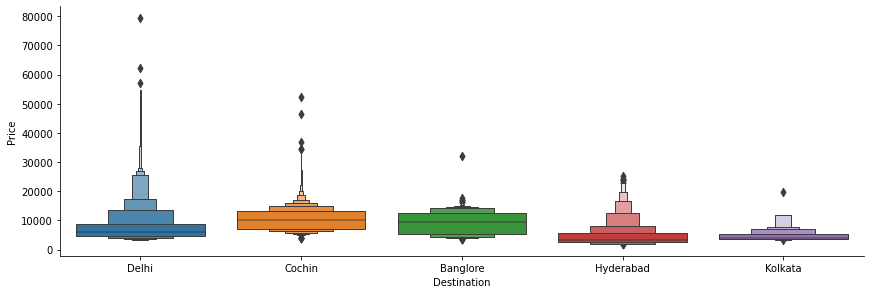

In [14]:
# If we are going to New Delhi the prices are slightly higher as compared to other cities
sns.catplot(x='Destination',y='Price',data=train_data.sort_values('Price',ascending=False),kind='boxen',aspect=3,height=4)

### Step 14 – Create dummy columns out of the Destination column.


In [15]:
destination = train_data[['Destination']]
destination = pd.get_dummies(destination,drop_first=True)
destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,1,0,0
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0


### Step 15 – Dropping crap columns.


In [16]:
train_data.drop(['Route','Additional_Info'],inplace=True,axis=1)

### Step 16 – Checking values in the Total stops column.


In [17]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

### Step 17 – Converting labels into numbers in the Total_stops column.


In [18]:
# acc to the data, price is directly prop to the no. of stops
train_data['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,0.0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2.0,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2.0,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1.0,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,1.0,13302,1,3,16,50,21,35,4,45


### Step 18 – Checking the shapes of our 4 data frames.


In [19]:
print(airline.shape)
print(source.shape)
print(destination.shape)
print(train_data.shape)

(10683, 11)
(10683, 4)
(10683, 4)
(10683, 13)


### Step 19 – Combine all 4 data frames.


In [20]:
data_train = pd.concat([train_data,airline,source,destination],axis=1)
data_train.drop(['Airline','Source','Destination'],axis=1,inplace=True)
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0.0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,1,0,0
1,2.0,7662,1,5,5,50,13,15,7,25,...,0,0,0,0,1,0,0,0,0,0
2,2.0,13882,9,6,9,25,4,25,19,0,...,0,0,0,1,0,0,1,0,0,0
3,1.0,6218,12,5,18,5,23,30,5,25,...,0,0,0,0,1,0,0,0,0,0
4,1.0,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,1,0,0


### Step 20 – Taking out train data.


In [21]:
X = data_train.drop('Price',axis=1)
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0.0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,1,0,0
1,2.0,1,5,5,50,13,15,7,25,1,...,0,0,0,0,1,0,0,0,0,0
2,2.0,9,6,9,25,4,25,19,0,0,...,0,0,0,1,0,0,1,0,0,0
3,1.0,12,5,18,5,23,30,5,25,0,...,0,0,0,0,1,0,0,0,0,0
4,1.0,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,1,0,0


### Step 21 – Take out train data labels.


In [22]:
y = data_train['Price']
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

### Step 22 – Checking correlations between columns.


<AxesSubplot:>

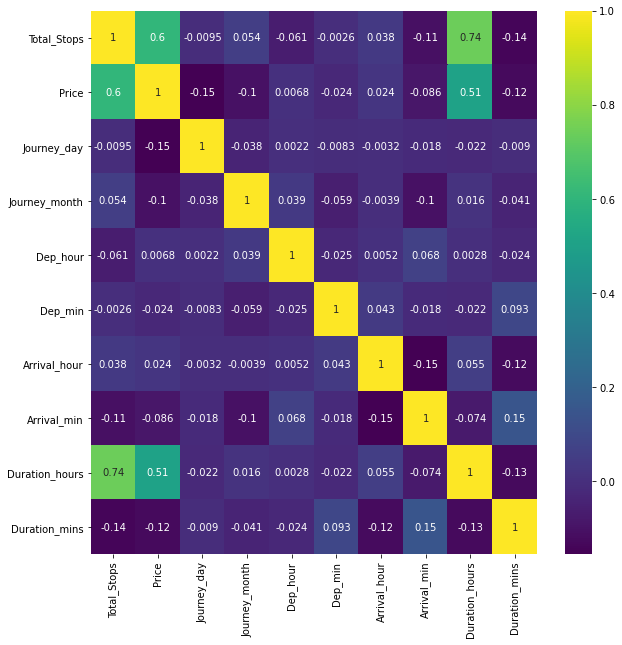

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(train_data.corr(),cmap='viridis',annot=True)

### Step 23 – First try out the ExtraTreesRegressor model for Flight Price Prediction.


In [24]:
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor

# Assuming X and y are pandas DataFrames/Series
# Check for NaN values
print(X.isnull().sum())  # Check NaN values in X
print(y.isnull().sum())  # Check NaN values in y

# Impute or remove NaN values
X = X.fillna(X.mean())  # Impute NaN values with mean (you can use other strategies)
y = y.dropna()  # Remove rows with NaN values in y





Total_Stops                                  1
Journey_day                                  0
Journey_month                                0
Dep_hour                                     0
Dep_min                                      0
Arrival_hour                                 0
Arrival_min                                  0
Duration_hours                               0
Duration_mins                                0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Chennai                               0
Source_Delhi 

In [25]:
reg = ExtraTreesRegressor()
reg.fit(X,y)

print(reg.feature_importances_)

[2.34283801e-01 1.42079136e-01 5.78006083e-02 2.38635244e-02
 2.17382878e-02 2.72394148e-02 1.99164390e-02 1.37735101e-01
 1.76674408e-02 8.55542399e-03 2.16384656e-03 1.91754705e-02
 1.35732900e-01 6.66986887e-02 1.78928865e-02 8.12279717e-04
 5.63465216e-03 9.80646802e-05 4.69584574e-03 6.66005077e-05
 7.44099535e-04 8.29286588e-03 4.91027976e-03 8.24305628e-03
 6.83767189e-03 1.83849303e-02 7.96969373e-03 7.66990230e-04]


### Step 24 – Checking feature importance given by ExtraTreeRegressor.


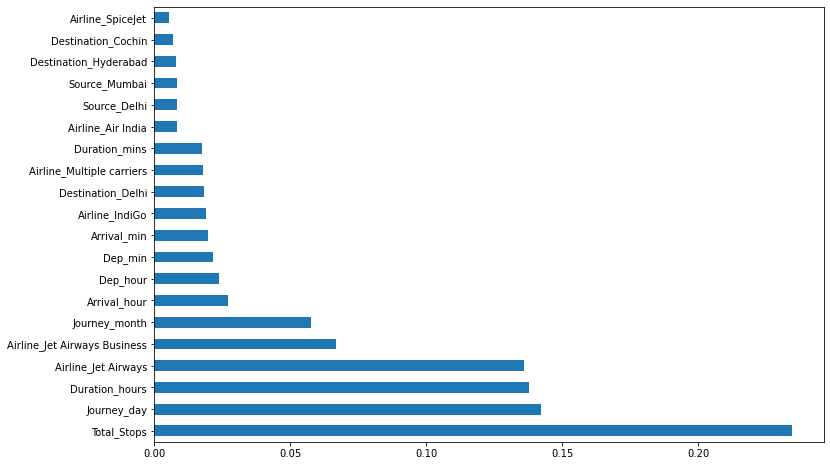

In [26]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(reg.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

### Step 25 – Splitting our data into Training and Testing data.


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Step 26 – Training Random Forest Regressor model for Flight Price Prediction.


In [28]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


# Random search of parameters, using 5 fold cross validation, search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions = random_grid,
                               scoring='neg_mean_squared_error', n_iter = 10, cv = 5, 
                               verbose=1, random_state=42, n_jobs = 1)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

### Step 27 – Checking the best parameters we got using Randomized Search CV.


In [29]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

### Step 31 – Printing metrics.


In [ ]:
print('r2 score: ', metrics.r2_score(y_test,y_pred))

### Step 32 – Saving our model.


In [ ]:
file = open('flight_rf.pkl', 'wb')
pickle.dump(rf_random, file)

### Step 29 – Plotting the residuals.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have defined prediction and y_test

# Plot the distribution of residuals
plt.figure(figsize=(20, 20))
sns.displot(y_test - prediction, kde=True)
plt.show()


### Step 30 – Plotting y_test vs predictions.


In [ ]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()